In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
X = np.loadtxt('/content/linearX.csv')
y = np.loadtxt('/content/linearY.csv')

In [33]:
X = (X - np.mean(X)) / np.std(X)

In [34]:
X = np.c_[np.ones(X.shape[0]), X]

In [35]:
def gradient_descent(X, y, learning_rate, iterations, batch_size=None):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for _ in range(iterations):
        if batch_size is None or batch_size == 'full':
            X_batch, y_batch = X, y
        else:
            indices = np.random.choice(m, batch_size, replace=True)
            X_batch, y_batch = X[indices], y[indices]

        gradient = (1/len(y_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
        theta -= learning_rate * gradient

        cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
        cost_history.append(cost)

    return theta, cost_history

In [36]:
learning_rate = 0.5
iterations = 50

In [37]:
theta, cost_history = gradient_descent(X, y, learning_rate, iterations)

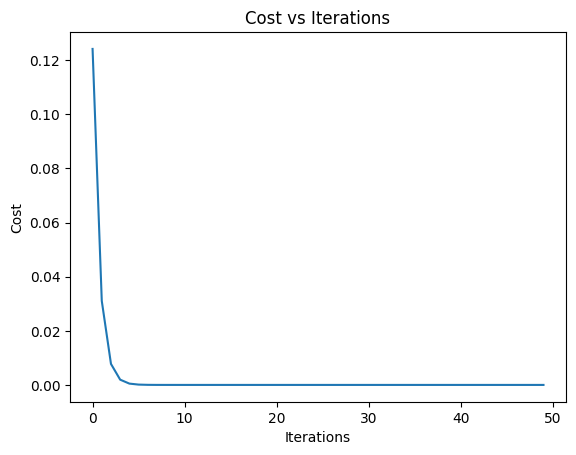

In [38]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

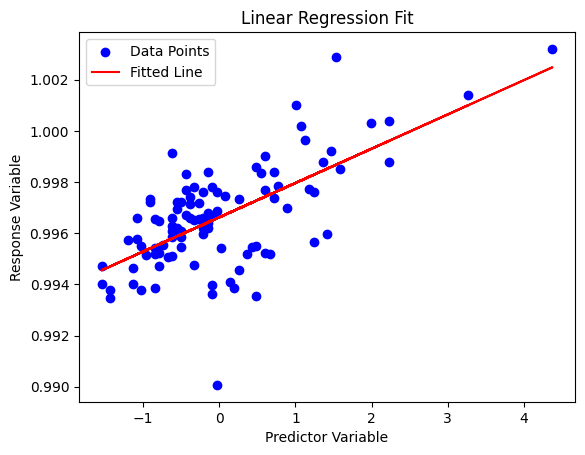

In [39]:
plt.scatter(X[:, 1], y, color='blue', label='Data Points')
plt.plot(X[:, 1], X.dot(theta), color='red', label='Fitted Line')
plt.xlabel('Predictor Variable')
plt.ylabel('Response Variable')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [40]:
print("Final Parameters (theta):", theta)
print("Final Cost:", cost_history[-1])

Final Parameters (theta): [0.9966201 0.0013402]
Final Cost: 1.1947898109836577e-06


In [41]:
learning_rates = [0.005, 0.5, 5]
cost_histories = []

for lr in learning_rates:
    _, cost_history = gradient_descent(X, y, lr, iterations)
    cost_histories.append(cost_history)

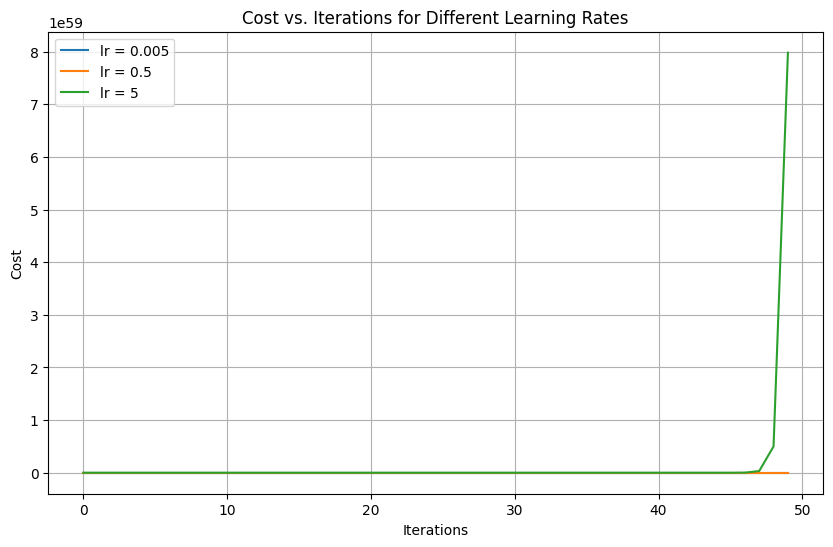

In [42]:
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(iterations), cost_histories[i], label=f'lr = {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()

In [43]:
lr = 0.1
theta_batch, cost_batch = gradient_descent(X, y, lr, iterations, 'full')
theta_sgd, cost_sgd = gradient_descent(X, y, lr, iterations, 1)
theta_mini, cost_mini = gradient_descent(X, y, lr, iterations, 32)

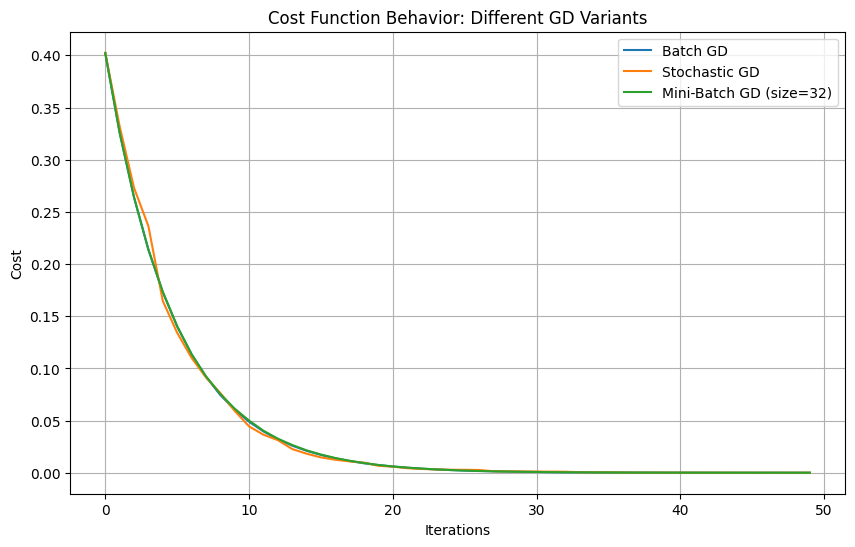

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(cost_batch, label='Batch GD')
plt.plot(cost_sgd, label='Stochastic GD')
plt.plot(cost_mini, label='Mini-Batch GD (size=32)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Behavior: Different GD Variants')
plt.legend()
plt.grid(True)
plt.show()